In [1]:
import ipympl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

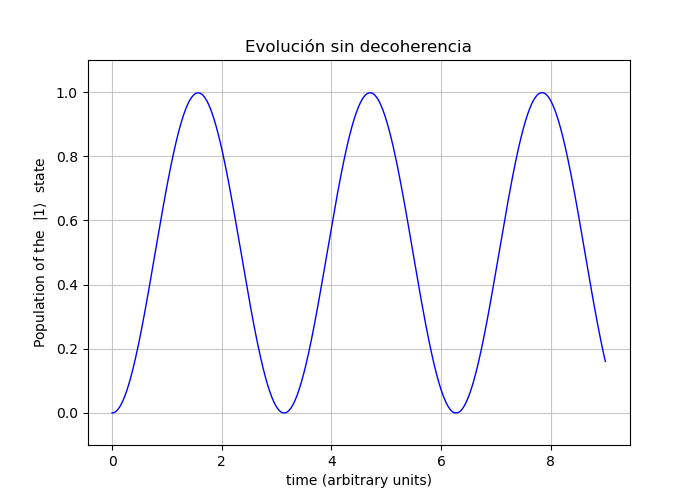

In [3]:
# definimos los operadores de Pauli
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_plus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_minus = np.array([[0, 1], [0, 0]], dtype=complex)

# definimos los parámetros del sistema
# (se han definido estos valores de los parámetros para que la gráfica nos salga igual que a Jorge)
hbar = 1.0545718e-34 / (2 * np.pi)
Delta_q = 0.1  # desplazamiento de frecuencia
Omega = 2  # frecuencia de Rabi 

# definimos el hamiltoniano sin decoherencia
H = (hbar * Delta_q / 2) * sigma_z + (hbar * Omega / 2) * (sigma_plus + sigma_minus)

# definimos rho inicial
rho_initial = np.array([[1, 0], [0, 0]], dtype=complex)

# tiempos de integración
t_points = 100000
t_max = 9
t = np.linspace(0, t_max, t_points)
dt = t[1] - t[0]

# hacemos la evolución de la ecuación de Lindblad (sin términos de Lindblad ya que no hay decoherencia)
rho_t = np.zeros((t_points, 2, 2), dtype=complex)
rho_t[0] = rho_initial

for i in range(1, t_points):
    # derivada de rho
    drho_dt = -1j / hbar * (np.dot(H, rho_t[i - 1]) - np.dot(rho_t[i - 1], H))

    # método de Euler para rho
    rho_t[i] = rho_t[i - 1] + drho_dt * dt

# calculamos la probabilidad de ocupación del estado excitado en función del tiempo
excited_state_population = np.abs(rho_t[:, 1, 1])

# grafica
plt.figure(figsize=(7, 5))
plt.plot(t, excited_state_population, color='blue', lw=1)
plt.xlabel('time (arbitrary units)')
plt.ylabel(r'Population of the  $|1\rangle$  state')
plt.title('Evolución sin decoherencia')
plt.grid(True, alpha=0.7)
plt.ylim(-0.1, 1.1)
plt.show()